#  Crime Analysis on San Francisco City

Given San Francisco city crime dataset collected summary 2014, I started analysis on any correlation between types of crime and time a day. After few analysis, I found that there are few crimes show clear pattern and correlation with time of a day, especially, THEFT/LACENY and DRIVING UNDER THE INFLUENCE happened in the evening more than the other time a day. I will show how I could end up with this conclusion as a next step. First of all, I start with importing python library and datasets required for this analysis.

a. Import library

In [104]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import datetime as dt
from datetime import datetime


b. Import San Francisco dataset

In [105]:
df = pd.read_csv('/Users/joohlee/Desktop/Cousera/Data_Science_at_Scale/Material/datasci_course_materials/assignment6/sanfrancisco_incidents_summer_2014.csv',delimiter=',')

c. Datasets schema

In [106]:
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000
5,140734349,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434916010
6,140734349,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE FOR SALE,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434916662
7,140734349,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Sunday,08/31/2014,23:13,SOUTHERN,"ARREST, BOOKED",11TH ST / MINNA ST,-122.416578,37.773907,"(37.773907074489, -122.416578493475)",14073434965050
8,140738147,OTHER OFFENSES,EVADING A POLICE OFFICER RECKLESSLY,Sunday,08/31/2014,23:00,INGLESIDE,NONE,1400 Block of DOLORES ST,-122.424498,37.746649,"(37.7466488718366, -122.424497944857)",14073814727175
9,140734258,TRESPASS,TRESPASSING,Sunday,08/31/2014,23:00,CENTRAL,"ARREST, CITED",900 Block of MASON ST,-122.410846,37.792316,"(37.7923158747647, -122.410845624227)",14073425827195


As below data shows, Total 34 types of crimes observed during summar in 2014

d. types of crime categories

In [107]:
set(df.Category)

{'ARSON',
 'ASSAULT',
 'BRIBERY',
 'BURGLARY',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'DRUG/NARCOTIC',
 'DRUNKENNESS',
 'EMBEZZLEMENT',
 'EXTORTION',
 'FAMILY OFFENSES',
 'FORGERY/COUNTERFEITING',
 'FRAUD',
 'GAMBLING',
 'KIDNAPPING',
 'LARCENY/THEFT',
 'LIQUOR LAWS',
 'LOITERING',
 'MISSING PERSON',
 'NON-CRIMINAL',
 'OTHER OFFENSES',
 'PORNOGRAPHY/OBSCENE MAT',
 'PROSTITUTION',
 'ROBBERY',
 'RUNAWAY',
 'SECONDARY CODES',
 'STOLEN PROPERTY',
 'SUICIDE',
 'SUSPICIOUS OCC',
 'TRESPASS',
 'VANDALISM',
 'VEHICLE THEFT',
 'WARRANTS',
 'WEAPON LAWS'}

First of All, I was interested in how do incidents vary by time of day. In order to do this, I had to create 24 categories divided by hour. Hence as next step, I first created 2 new columns, "Hour" and "Min" by split "Time" into 2 pieces with ":". And I could use "Hour" columns as 24 categories I could put each incidents in.

e. Split "Time" into "Hour" and "Min"

In [108]:
df['Hour'], df['Min'] = df['Time'].str.split(':').str

Next step was to create 34 different plot by crime types. Each crime plot was created as bar chart with "Hour" as x-axis and the total count of incidents per each hour as y-axis as below.

f. Draw bar chart for each crimes.

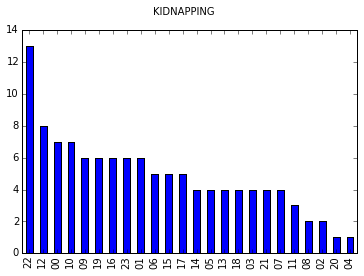

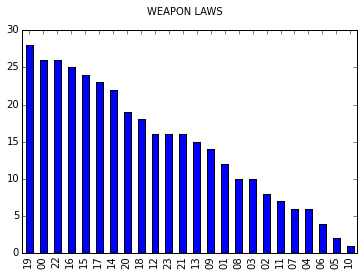

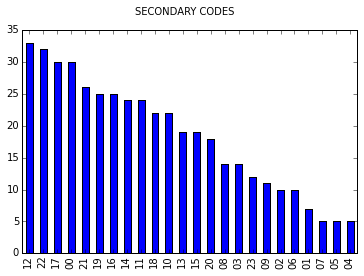

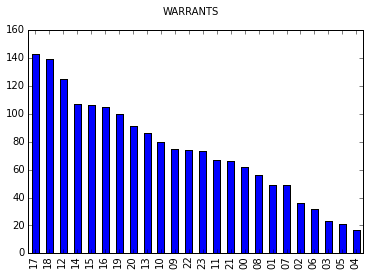

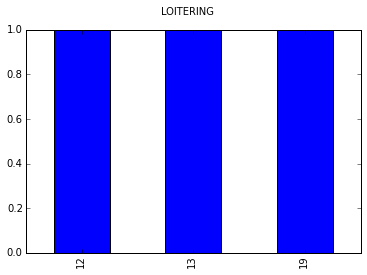

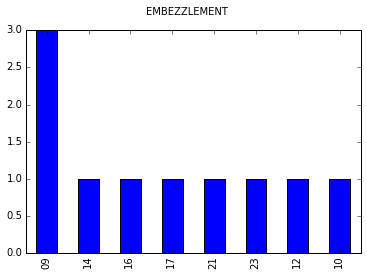

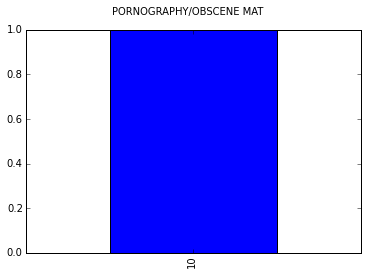

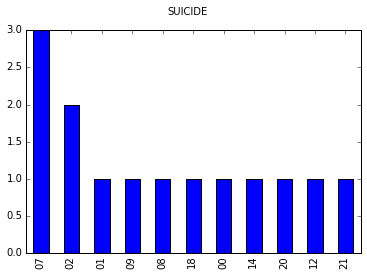

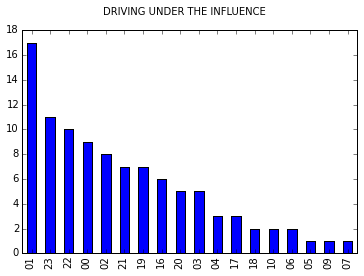

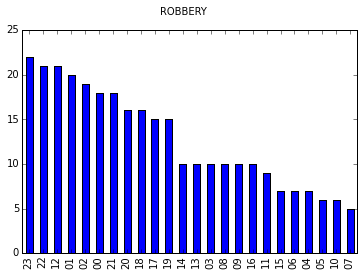

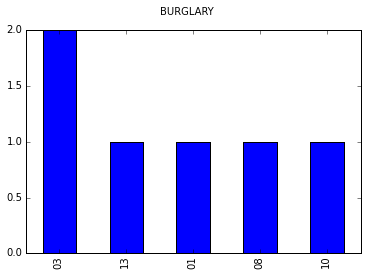

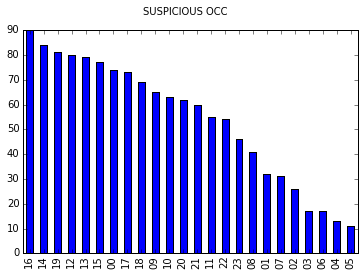

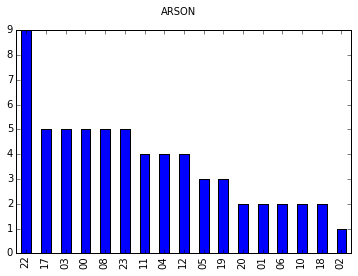

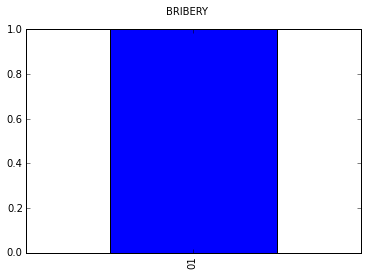

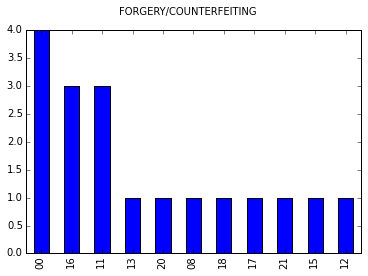

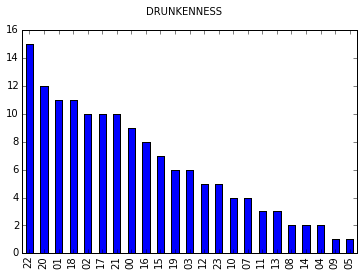

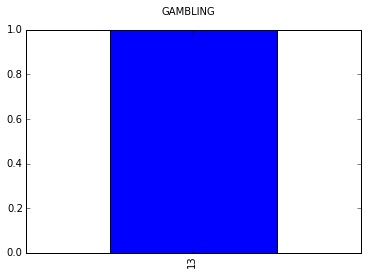

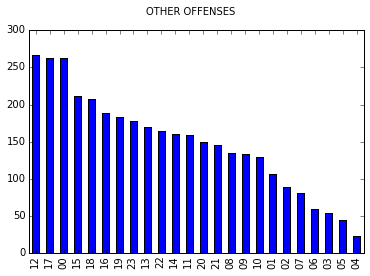

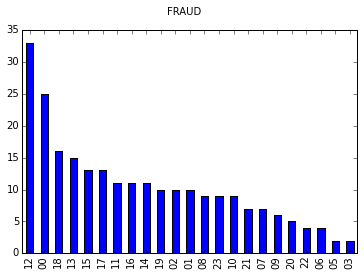

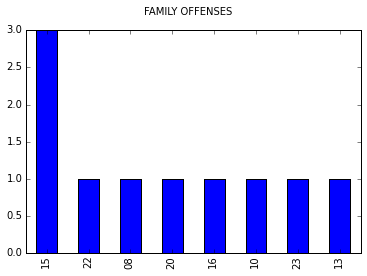

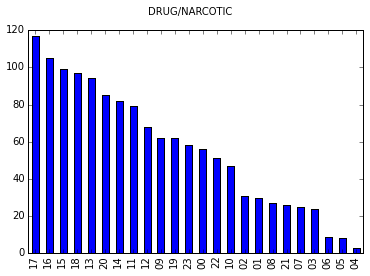

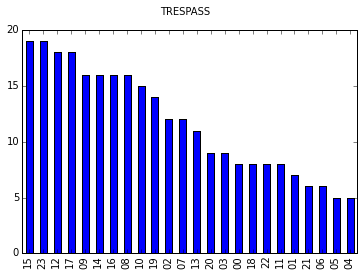

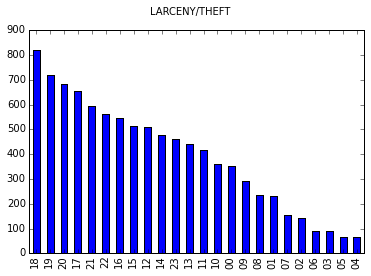

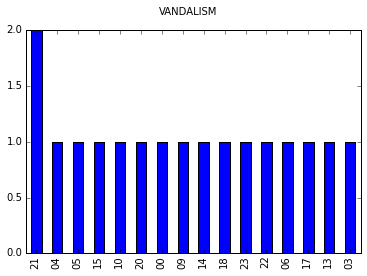

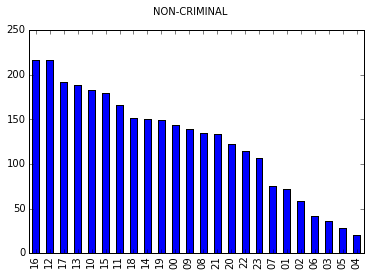

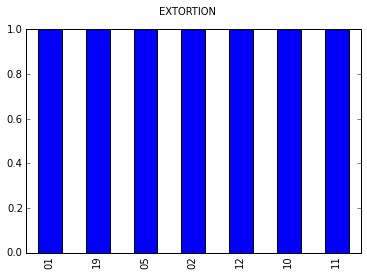

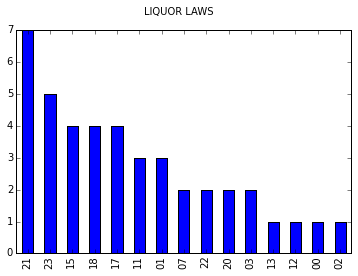

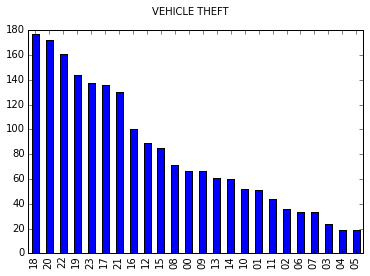

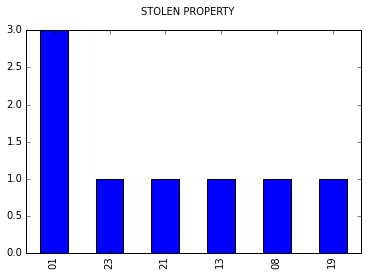

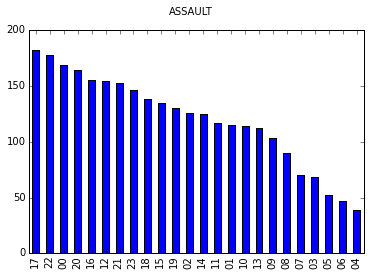

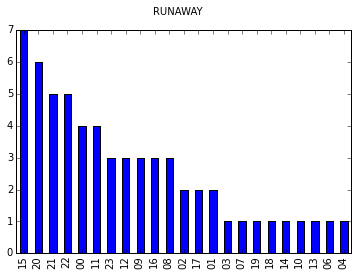

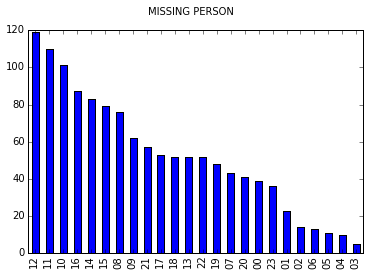

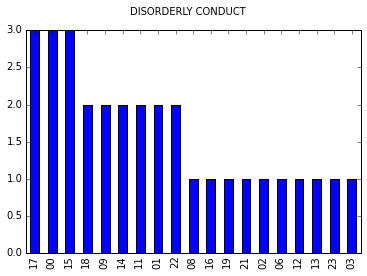

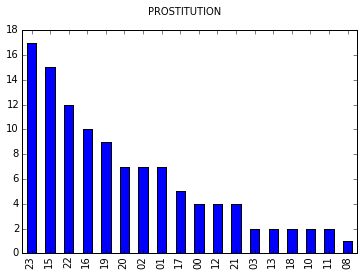

In [121]:
categories = set(df.Category)
i = 0
for cat in categories:
    i = i+1
    df_temp = df[df['Category']== cat]
    plt.figure(i)
    df_temp['Hour'].value_counts().plot(kind='bar')
    plt.figure(i).suptitle(cat)

plt.show()

By Analyzing the grapth, I was able to find crimes that shows the pattern closely related to time of a day. e.g. "driving under the influece" was happend at most around "1 AM" in the morning and "vehicle theft" happens the most between "5 PM and 11 PM". 

My next investigation was to find which incidents are most common in the evening? In order to do this analsys, I had to first create the category that includes "Hour" belong to evening. From my definition, "evening" inlcudes hours between 5 pm and midnight. So I created dataframe includes only "Hour" belong to them.

g. Create datafraem only includes "Hour" in the evening.

In [116]:
df_eve = df[df['Hour'].isin(['17', '18','19','20','21','22','23','00'])]

With this new dataframe "df_eve", I created bar horizental plot that shows total number of incidents happened in the evening.

h.Create Bar chart for crimes in the evening.

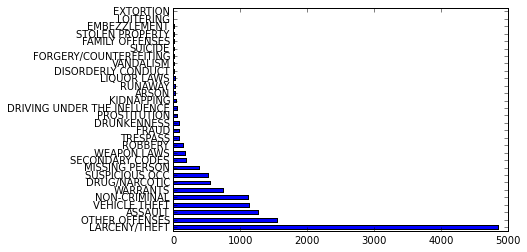

In [117]:
df_eve['Category'].value_counts().plot(kind='barh')

As you can observe in the above plot, "LARCENT/THEFT" is the most frequent type of crimes occurred in the evening.

My last analysis was to find during what periods of the day are robberies most common.  In order to find out this infromation, I extracted "ROBBERY" incidents only from category and created new dataframe "df_rob" as below.
and Like I did for previous analysis, I draw the bar chart with "total incident" as x-axis and with "Hour" as "y-axis" as below. 

i. Create dataframe df_rob for "ROBBERY"

In [119]:
df_rob = df[df['Category']=='ROBBERY']

j. Create bar chart for "ROBBERY" 

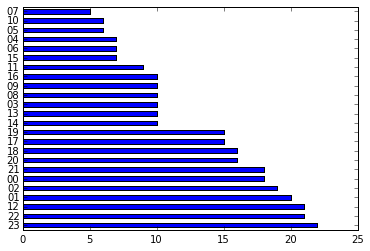

In [120]:
df_rob['Hour'].value_counts().plot(kind='barh')

As you've noticed above, Robbery occured most often around "23 PM" a day